In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('../../Datasets/milk.csv', index_col=0)
df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [4]:
X = df.iloc[:,:].values

In [5]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

#### Elbow Method

In [6]:
variations = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(X_tr)
    variation = km.inertia_
    variations.append(variation)

variations

c:\Users\HP\miniconda3\envs\da310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\miniconda3\envs\da310\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\miniconda3\envs\da310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\miniconda3\envs\da310\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

[124.99999999999997,
 49.854659507364545,
 30.822631131428075,
 18.19497652339287,
 14.109121029284545,
 10.5869199725641,
 7.851896173099096,
 6.075610486828872,
 4.883255641982216,
 3.693504511122214]

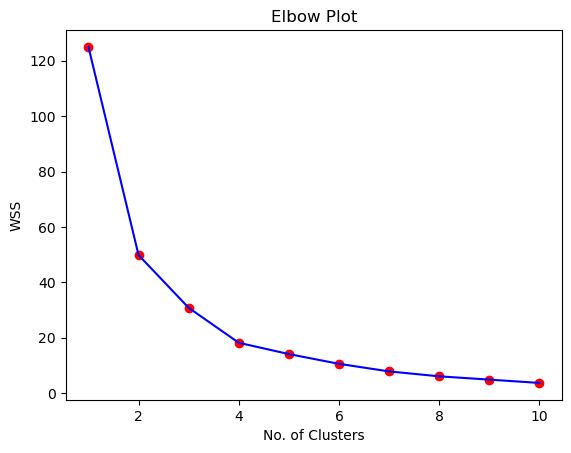

In [9]:
cluster = np.arange(1, 11)
plt.scatter(cluster, variations, c='red')
plt.plot(cluster, variations, c='blue')
plt.title("Elbow Plot")
plt.xlabel("No. of Clusters")
plt.ylabel("WSS")
plt.show()

In [13]:
km.labels_

array([5, 5, 5, 5, 0, 4, 4, 8, 2, 2, 8, 4, 5, 2, 4, 8, 6, 7, 9, 6, 1, 1,
       1, 3, 3])

In [11]:
df.shape

(25, 5)